In [1]:
print("**********Titanic_Passenger_Representation************")

**********Titanic_Passenger_Representation************


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
import re
%matplotlib inline
from sklearn import model_selection, preprocessing, naive_bayes,metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df_titanic = pd.read_csv('/Users/jaswanthjerripothula/Desktop/Project6@TitanicPassenger/titanicpassenger.csv')
print(df_titanic.shape)

(418, 12)


In [7]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
df_titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
df_titanic.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [10]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

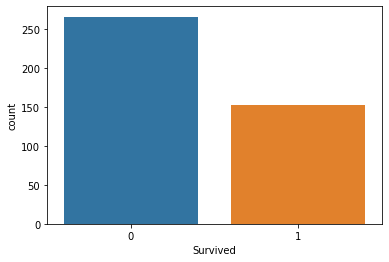

In [11]:
sn.countplot(x="Survived", data= df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

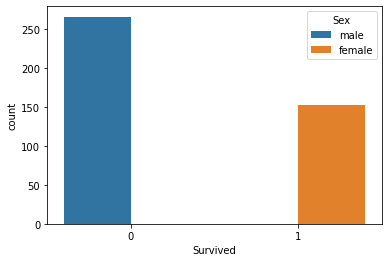

In [13]:
sn.countplot(x="Survived", hue="Sex", data=df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

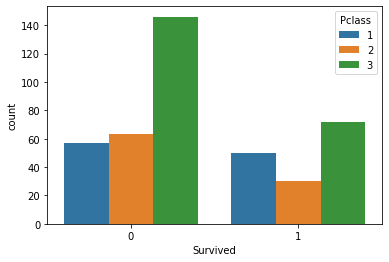

In [14]:
sn.countplot(x="Survived", hue="Pclass", data=df_titanic)

<AxesSubplot:ylabel='Frequency'>

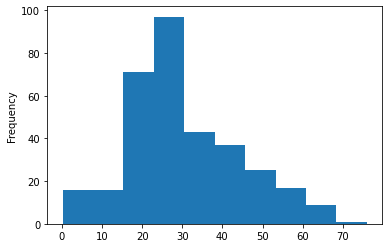

In [15]:
df_titanic['Age'].plot.hist()

In [16]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

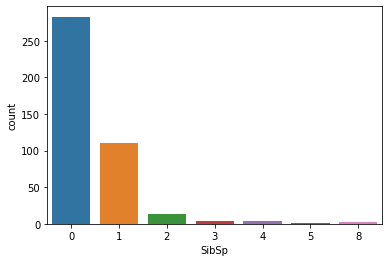

In [17]:
sn.countplot(x="SibSp", data= df_titanic)

<AxesSubplot:>

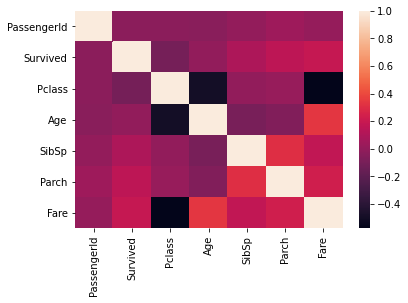

In [18]:
sn.heatmap(df_titanic.corr())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

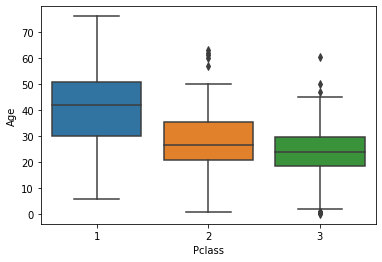

In [19]:
sn.boxplot(x="Pclass",y="Age",data=df_titanic)

In [20]:
df_titanic.drop("Cabin",axis=1,inplace=True)

In [21]:
df_titanic.dropna(inplace=True)

<AxesSubplot:>

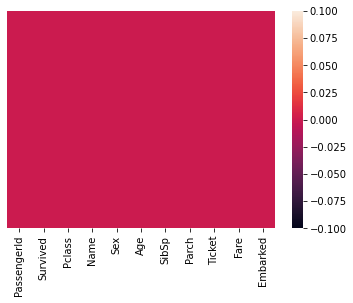

In [23]:
sn.heatmap(df_titanic.isnull(),yticklabels=False)

In [24]:
sex = pd.get_dummies(df_titanic["Sex"],drop_first=True)

In [25]:
embark = pd.get_dummies(df_titanic['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [26]:
pc1 = pd.get_dummies(df_titanic["Pclass"],drop_first=True)
pc1.head(5)

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [27]:
pd.concat([df_titanic,sex,embark,pc1],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,0,0,1,0,1
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q,0,1,0,0,0
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,0,0,1,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,0,0,0,0


In [30]:
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [31]:
y = df_titanic["Survived"]
x = df_titanic.iloc[:,1:]

In [32]:
x.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [42]:
type (x_train)

pandas.core.frame.DataFrame

In [44]:
#convert the raw document into a matrix of TF-IDF features
tfidf_vect = TfidfVectorizer(analyzer = 'word', token_pattern = r'\w{1,}', max_features = 20000)
#Create TF-IDF with X_train
tfidf_vect.fit(x_train)

TfidfVectorizer(max_features=20000, token_pattern='\\w{1,}')

In [57]:
#the TF-IDF created with X_train for transforming X_train and X_test
xtrain_tfidf = tfidf_vect.transform(x_train)
xvalid_tfidf = tfidf_vect.transform(x_test)

In [58]:
#Create a model for NaiveBaye's Model
model = naive_bayes.MultinomialNB()

In [66]:
df_titanic = pd.read_csv('/Users/jaswanthjerripothula/Desktop/Project6@TitanicPassenger/titanicpassenger.csv', header = None, names = ['Survived', 'Name', 'Ticket'])
df_titanic.set_index('Survived', inplace = True)


In [67]:
df_titanic.head(10)

,Name,Ticket
Survived,,
Fare,Cabin,Embarked
7.8292,NaN,Q
7,NaN,S
9.6875,NaN,Q
8.6625,NaN,S
12.2875,NaN,S
9.225,NaN,S
7.6292,NaN,Q
29,NaN,S


In [77]:
df_titanic.Name.value_counts()

B57 B59 B63 B66    3
C31                2
C101               2
A34                2
C116               2
                  ..
D34                1
D38                1
E31                1
C132               1
A21                1
Name: Name, Length: 77, dtype: int64

In [81]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, Fare to 22.3583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    92 non-null     object
 1   Ticket  419 non-null    object
dtypes: object(2)
memory usage: 9.8+ KB


In [82]:
print("*************Titanic_Passenger_Representaion is done successfully*************")

*************Titanic_Passenger_Representaion is done successfully*************
